## Body Mass Index EDA
***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [2]:
### Load the Dataset

In [4]:
df_hw = pd.read_csv("C:/Users/SARTHAK NIWATE/Documents/DSE Bangalore/EDA/Day 01/500_Person_Gender_Height_Weight_Index.csv")

In [5]:
df_hw.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
df_hw.shape

(500, 4)

In [8]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


## EDA Descriptive Statistics
***

### Measures of Central Tendency
##### From the measure of central tendencies, we will see depending on what we can analyze and on what can't analyze and why!

**1. Mean**
The calculation of the mean include all the data points. If any value being changed then the mean also changes. However, the mean doesn’t always locate the center of the data accurately. 
If the we have, skewed distribution, the outliers have a partial impact on the mean. The values in an extended tail changes the mean and the value goes away from the center. As the distribution becomes more skewed, the mean goes away from the center. Consequently, it’s best to use the mean as a measure of the central tendency when you have a symmetric distribution.


**2. Median**
Outliers and skewed data have a smaller effect on the median. This cannot give us the desired output. The median is not depend on all the values. When few values are more than that of most occured values, the effect on the median is smaller.  For any skewed distribution, the median is a better measure of central tendency than the mean.


**3. Mode**
Mode can only be used with categorical data. We cannot find central value because ordering the groups is not possible. In the discrete data, the mode represents the most common value. In the continuous data, if no values repeat, then there is no mode. If every value repeats for the same number of time then every value is mode. 


#####  symmetrical distribution for continuous data, the mean, median, and mode are equal. For ordinal data, the median or mode is the better choice. For categorical feature, the mode can be the option. 


**4. Quantiles**
The interquartile range is the middle half of the data. As it is said, median is a robust measure of central tendency in same terms interquartile range is a robust measure of variability. The quantiles are not depend on the entire data set hence, it not affected affected easily with outliers. The IQR is the best option for skewed distribution. 
The interquartile range is part between the 75th and 25th percentile of data. This range will be the are range of good values of dataset.

To define significant, representative and adequate values for a set of data. I'll use quantiles to analyze it.

In [9]:
# mean of features
df_hw.mean()

Height    169.944
Weight    106.000
Index       3.748
dtype: float64

In [10]:
# mode of features
df_hw.mode()

,Gender,Height,Weight,Index
0,Female,188.0,50,5.0
1,NaN,NaN,80,NaN
2,NaN,NaN,104,NaN


In [11]:
# Median of features
df_hw.median()

Height    170.5
Weight    106.0
Index       4.0
dtype: float64

In [12]:
# quantiles and IQR of data
q1 = df_hw.quantile(0.25)
q2 = df_hw.quantile(0.5)
q3 = df_hw.quantile(0.75)
IQR = q3-q1
print('Q1 is :', round(q1,2),'\n')
print('Q2 is :', round(q2,2),'\n')
print('Q3 is :', round(q3,2),'\n')
print('IQR is :', round(IQR,2),'\n')

Q1 is : Height    156.0
Weight     80.0
Index       3.0
Name: 0.25, dtype: float64 

Q2 is : Height    170.5
Weight    106.0
Index       4.0
Name: 0.5, dtype: float64 

Q3 is : Height    184.0
Weight    136.0
Index       5.0
Name: 0.75, dtype: float64 

IQR is : Height    28.0
Weight    56.0
Index      2.0
dtype: float64 



#### >> Visualize the distribution of 'Height' features with overlaying with mean and median of data

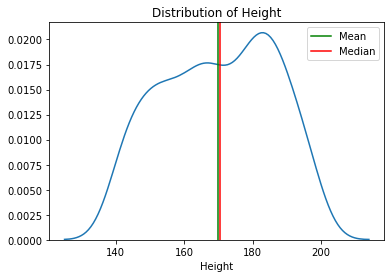

In [14]:
sns.distplot(df_hw['Height'],hist=False)
plt.axvline(df_hw['Height'].mean(),label='Mean',color='green')
plt.axvline(df_hw['Height'].median(),label='Median',color='red')
plt.title("Distribution of Height")
plt.legend()
plt.show()

## Measures of Dispersion
***

##### The measures of central tendency are not adequate to describe data. Two data sets can have the same mean but they can be entirely different. Thus to describe data, one needs to know the extent of variability. This is given by the measures of dispersion. Range, interquartile range, and standard deviation are the three commonly used measures of dispersion.

**1. Range**
The range is the difference between the largest and the smallest observation in the data. The prime advantage of this measure of dispersion is that it is easy to calculate. On the other hand, it has lot of disadvantages. It is very sensitive to outliers and does not use all the observations in a data set.It is more informative to provide the minimum and the maximum values rather than providing the range.

**2. Interquartile Range**
Interquartile range is defined as the difference between the 25th and 75th percentile (also called the first and third quartile). Hence the interquartile range describes the middle 50% of observations. If the interquartile range is large it means that the middle 50% of observations are spaced wide apart. The important advantage of interquartile range is that it can be used as a measure of variability if the extreme values are not being recorded exactly (as in case of open-ended class intervals in the frequency distribution). Other advantageous feature is that it is not affected by extreme values. The main disadvantage in using interquartile range as a measure of dispersion is that it is not amenable to mathematical manipulation.

**3. Standard Deviation**
Standard deviation (SD) is the most commonly used measure of dispersion. It is a measure of spread of data about the mean. SD is the square root of sum of squared deviation from the mean divided by the number of observations.
The reason why SD is a very useful measure of dispersion is that, if the observations are from a normal distribution, then 68% of observations lie between mean ± 1 SD 95% of observations lie between mean ± 2 SD and 99.7% of observations lie between mean ± 3 SD
The other advantage of SD is that along with mean it can be used to detect skewness. The disadvantage of SD is that it is an inappropriate measure of dispersion for skewed data.

**4. Varince**
Variance is the average squared difference of scores from the mean score of a distribution. Standard deviation is the square root of the variance

In [15]:
# Range
hw_min = df_hw['Height'].min()
hw_max = df_hw['Height'].max()
hw_range = hw_max - hw_min

print('Min value of Height is :', hw_min)
print('Max value of Height is :', hw_max)
print('Range of data is :', hw_range)

Min value of Height is : 140
Max value of Height is : 199
Range of data is : 59


In [16]:
# Variance
hw_var = df_hw['Height'].var()
print('Variance of Height :', round(hw_var,2))

Variance of Height : 268.15


In [17]:
# Standard Deviation
hw_std = df_hw['Height'].std()
print('Standard Deviation of Height :', round(hw_std,2))

Standard Deviation of Height : 16.38


## Covariance and Correlation
***

**1. Covariance**
Coavriance tells us how the one feature is moving with respect to other.

**2. Correlation**
Correlation tells us about the correlation between the features

In [18]:
# covariance
df_hw[['Height','Weight']].cov()

,Height,Weight
Height,268.149162,0.236473
Weight,0.236473,1048.633267


In [20]:
# df.cov() function automatically ignores the null values
# from the above covariance matrix, we can conclude that,
# 1. there relationship between height and weight is, as the value 0 the co-variance values of both the features
# is deferring a lot and 50% of values are increasing with directly propotional to each other 

In [19]:
# correlation
df_hw[['Height','Weight']].corr()

,Height,Weight
Height,1.000000,0.000446
Weight,0.000446,1.000000


In [ ]:
# The obtained correlation matrix tells us that when correlation value between features is near to -1 means,
# they are less correlated with each other and the correlation value near to +1 means,
# They are strongly correlated with each other.
# The correlation value between weight and height is near and around zero that shows that from all the values
# 50% values are correlated with each other.